<span style="font-size: 30px; font-weight: bold">Analysis of Sepal and Pedal Dimensions Within Different Flower Species</span>

<span style="font-size: 18px;">Author: Stephen Miller</span>

<span style="font-size: 18px;">February 2, 2024</span>

<span style="font-size: 24px; font-weight: bold">Purpose</span>

In this paper, we will use Jupyter alongside Python to analyze the relationship between sepal width and sepal length, pedal width and pedal length, and the relationship between them in setosas, versicolors, and virginicas.  


In [550]:
#We start by importing dependencies

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


<span style="font-size: 24px; font-weight: bold">Data Acquisition</span>

In [551]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


<span style="font-size: 24px; font-weight: bold">Initial Data Inspection</span>

In [552]:
#rename columns to be more presentatable in tables and graphs
df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)
df.rename(columns={'sepal_width': 'Sepal Width'}, inplace=True)
df.rename(columns={'petal_length': 'Petal Length'}, inplace=True)
df.rename(columns={'petal_width': 'Petal Width'}, inplace=True)
df.rename(columns={'species': 'Species'}, inplace=True)

print(df.head(10))
print(df.shape)
print(df.dtypes)

   Sepal Length  Sepal Width  Petal Length  Petal Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
Sepal Length    float64
Sepal Width     float64
Petal Length    float64
Petal Width     float64
Species          object
dtype: object


In our initial inspection of the data set, we see we are provided with Sepal Length, Sepal Width, Petal Lenth, Petal Width, and the Species it is tied to. All numeric values are stored in floats.

<span style="font-size: 24px; font-weight: bold">Initial Descriptive Statistics</span>


In [553]:
#use built in describe function to get statistics for the data set
print(df.describe())

Length_Ratio = round(5.84/3.75, 2)
print("Average Sepal Length / Average Petal Length = " + str(Length_Ratio))

Width_Ratio = round(3.06/1.20, 2)
print("Average Sepal Width / Average Petal Length = " + str(Width_Ratio))

       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Average Sepal Length / Average Petal Length = 1.56
Average Sepal Width / Average Petal Length = 2.55


From the initial statistics, you can see that the sepals are generally larger than the petals, both in their length and width. Notably, the ratio of average sepal length to average petal length is 1.56, while the same ratio of their widths is 2.55. This suggests that the widths differ in ratio more than lengths. However, the standard deviation in petal length is fairly high, so we can expect relatively high variance in petal lengths, which we'll have to revisit as we look into more data.

<span style="font-size: 24px; font-weight: bold">Initial Data Distribution for Numerical Columns</span>


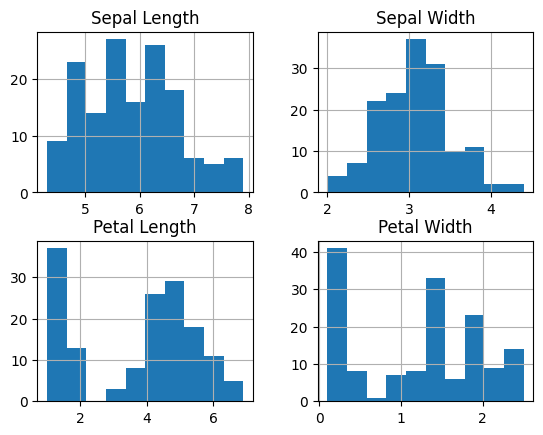

In [554]:
# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

The plots above for distributions of the four numeric values we are looking at. From this, it seems sepal length and width are closer to a standard bell curve of values, suggesting there may be more consistency across the different species, whereas there is a clear separation in the petal data. There is very few petal lengths between 2.0-2.5 and petal widths from 0.5-1.0. It would be very odd to see this in a standard data set looking at one species, which suggests there may be a large separation in petal dimensions in different species, which we will look into further.

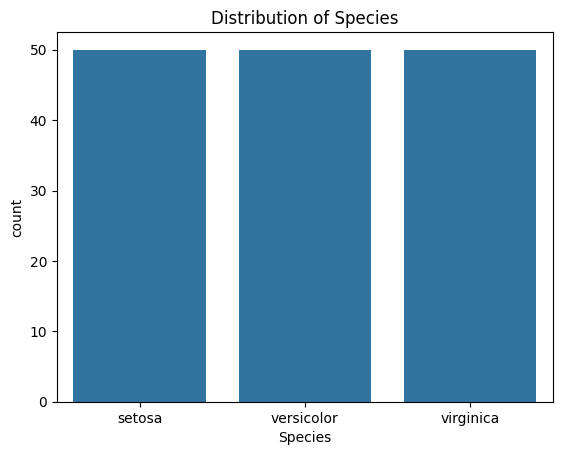

In [555]:
df['Species'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


First, we have to confirm how much weight each species has in the data set. In this case, each species had 50 specimins analyzed, so the weight each species brings to the data set is equal.

<span style="font-size: 24px; font-weight: bold">Initial Data Distribution for Categorical Columns</span>


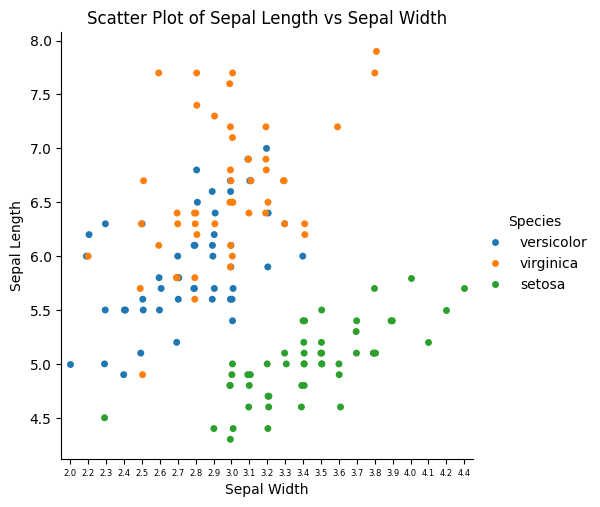

In [556]:
#make a scatterplot of sepal width vs sepal lengths
sns.catplot(df, x='Sepal Width', y='Sepal Length', hue='Species')

plt.xticks(fontsize=6) #lower font size of x-axis
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()



We now bring separate the different species by using different colors. In the first graph, we focus on sepal dimensions. Noticably, both versicolor and virginica are pretty well combined, with virginica having noticably higher max values, on average, and versicolor having noticably lower min values, on average, between the two species.

Although setosa has overlapping widths and lengths with the other species, it is clearly separated on the graph. The relatively short length and longer width pushes the group of data for setosa further right on the graph. 

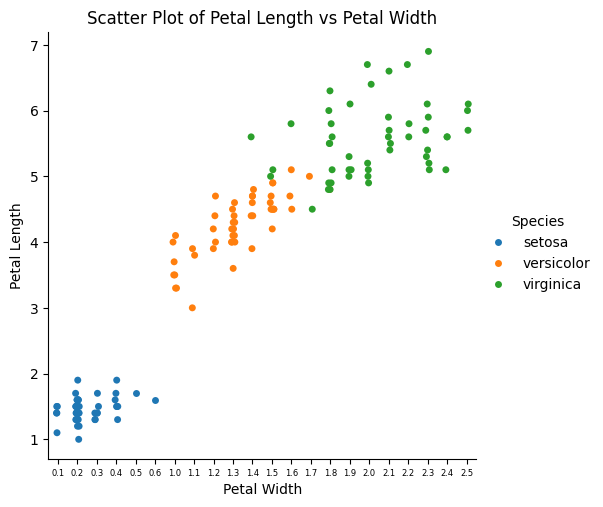

In [557]:
#make a scatterplot of petal width vs petal lengths
sns.catplot(df, x='Petal Width', y='Petal Length', hue='Species') 

plt.xticks(fontsize=6) #lower font size of x-axis
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

Now we look at the same graph, but for petals. Here, we see a clear distinction between each species. There is very little crossover between them. We also see a fairly large white space between the setosa set and versicolor set, which helps explain why we saw the gap in the histograms above.

<span style="font-size: 24px; font-weight: bold">Initial Data Transformation and Feature Engineering</span>

Now we will look further into the data by analyzing the ratio of length to width for both sepals and petals, in all species.

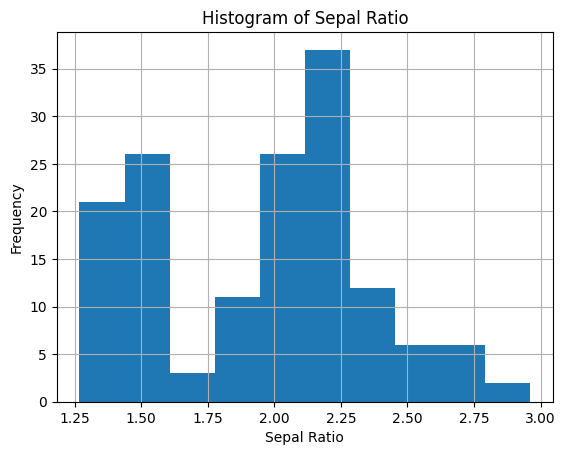

In [558]:
# Creating a new variable for the ratio of sepal length to sepal width
df['Sepal Ratio'] = df['Sepal Length'] / df['Sepal Width']

df['Sepal Ratio'].hist()

plt.title('Histogram of Sepal Ratio')
plt.xlabel('Sepal Ratio')
plt.ylabel('Frequency')

plt.show()



From this initial chart, we see many of the specimins from between 2-2.25, which is a small window. However, there is another large set that falls between 1.25 and 1.60, with very few falling between the sets, from 1.6-2.0. This is similar to the gap we saw above in pedal dimensions, which ended up representing a gap between species. We will see if the same trend occurs here. 

First, let's look at the same graph for the petal ratio.

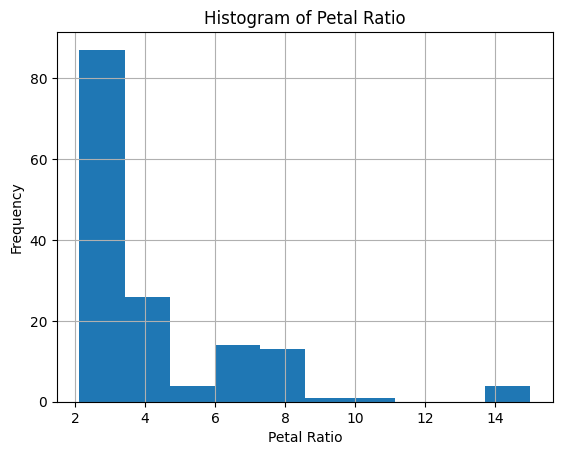

In [559]:
df['Petal Ratio'] = df['Petal Length'] / df['Petal Width']

df['Petal Ratio'].hist()
plt.title('Histogram of Petal Ratio')
plt.xlabel('Petal Ratio')
plt.ylabel('Frequency')
plt.show()

In this graph we see a large majority of the specimins fall between 2 and 4, but there are hugh descrepencies between some specimins. Some petal ratios go all the way past 14. We will have to see if the variance is reflective of the flowers overall, or if a specific species is skewing the results.

To do that, let's separate the data by species.

<link rel="stylesheet" type="text/css" href="fonts.css">

<span class="section_title">Further Visualizations</span>

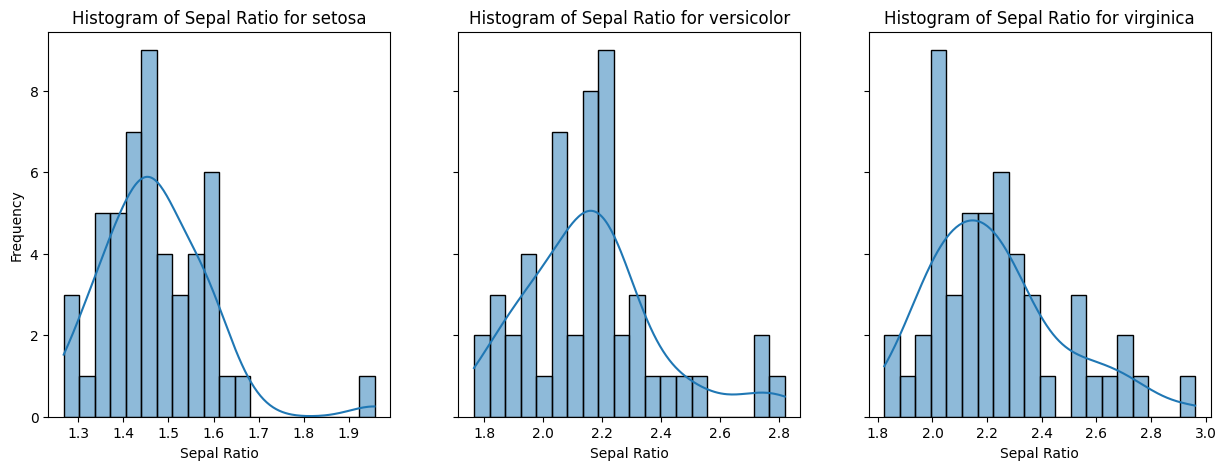

In [560]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

#for loop to make a histogram for each species
for i, species in enumerate(df['Species'].unique()):
    sns.histplot(data=df[df['Species'] == species], x='Sepal Ratio', bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of Sepal Ratio for {species}')
    axes[i].set_xlabel('Sepal Ratio')

# Set common y-axis label
axes[0].set_ylabel('Frequency')

plt.show()

Here, we see that the general distribution shape is very similar between all 3 species. However, the values do vary. Setosa has a much smaller sepal ratio than the other two, which makes sense when we think back to their sepals being shorter and wider than the others, on average. As we look to versivolor and virginica, there are differences in their peaks, but in general they follow very similar patterns, with their minimums being around 1.8, maxes being close to 3.0, and a very similar distribution curve.

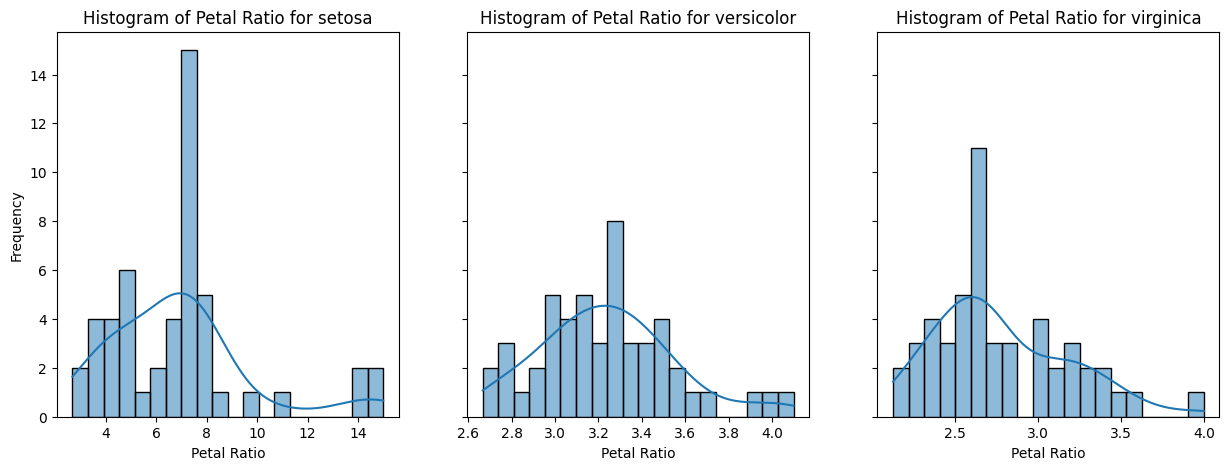

In [561]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, species in enumerate(df['Species'].unique()):
    sns.histplot(data=df[df['Species'] == species], x='Petal Ratio', bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of Petal Ratio for {species}')
    axes[i].set_xlabel('Petal Ratio')

# Set common y-axis label
axes[0].set_ylabel('Frequency')

plt.show()

Now we look at petals, where setosa once again stands out from the other two species. Setosa has a much higher petal ratio, with very long, thin petals. This is shown with values from 3 to over 14. This explains the large skew we noticed in the combined petal ratio histogram.

As for versivolor and virginica, we once again see fairly similar numbers between both, like we did in the data for sepal ratio. Notably, petal length and petal width were separated between the two species in the original scatter plot for petal length vs petal width. Even though they have different values, their ratios are similar. This makes sense, because the slope of the petal length vs petal width lines were similar.

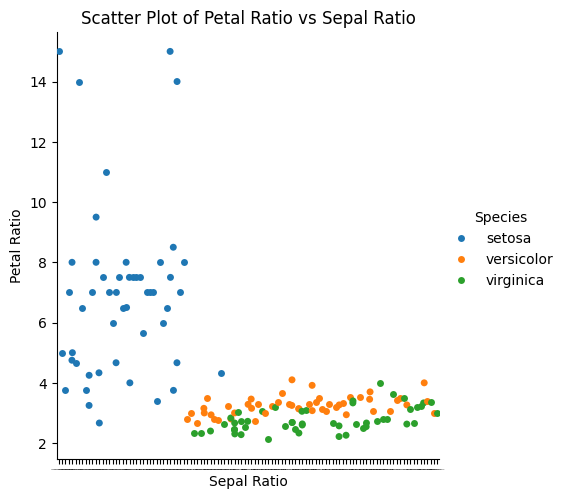

In [562]:
#scatter plot of petal ratio vs sepal ratio
sns.catplot(df, x='Sepal Ratio', y='Petal Ratio', hue='Species')

plt.xticks(fontsize=0)
plt.title('Scatter Plot of Petal Ratio vs Sepal Ratio')
plt.show()


This scatter plot supports our observations above. Versicolor and Virginica have very similar petal and sepal ratios, while setosa does not.


<span style="font-size: 24px; font-weight: bold">Conclusions</span>

In conclusion, Versicolor and Virginica have fairly similar ratios, with virginica having wider and longer petals. Looking at these two species, you could assume there is a correlation between petal length and petal width, sepal length and sepal width, and petal ratio and sepal ratio. However, Setosa's presence in the data set shows that this is not the case. Setosa has a very different range of sepal ratios and petal ratios, along with all other statistics. It begs the question, what are the reasons for the similarities. Is Versicolor and Virginica related species in any way, or do they just happen to have some similarities, while Seposa is wildly different.